You will practice your data cleaning skills on the main data (not the summarized version) by perfoming the following tasks:

#Explore the missingness in the dataset for categorical and numerical data
#Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.
#Drop non-consequntial fields
#Transform temporal data to their corrrect format (date time)
#Perfom a full EDA and demonstrate the validity of the following    assumptions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Your code using pandas, numpy, seaborn, matplotlib


In [2]:
file_path = r'C:\Users\user\Desktop\PYTHON\chip_dataset.csv'

df = pd.read_csv(file_path)

In [3]:
#DATA DEFINATION (UNDERSTAND THE DATA)
print(df.head())
print(df.describe()) #summary



   Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2     28.0              NaN                    NaN      2600.0    Intel   
3     80.0            160.0                 1400.0      1800.0    Intel   
4    125.0            258.0                  758.0      3700.0  Unknown   

  Vendor  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0    AMD          NaN   

In [4]:
print(df.info()) #generals of the dataframe
print(df.dtypes)
print(df.shape) #checking shape of the dataframe

print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [14]:
# CHECKING FOR MISSINGNESS

#A. ID MISSING VALUES

missing_values = df.isnull()
missing_values_percentages = (missing_values).mean() * 100
#print(missing_values)
print(missing_values_percentages)

Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64


In [16]:

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display missing values and their percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


                       Missing Values  Percentage
Unnamed: 0                          0    0.000000
Product                             0    0.000000
Type                                0    0.000000
Release Date                        0    0.000000
Process Size (nm)                   9    0.185414
TDP (W)                           626   12.896580
Die Size (mm^2)                   715   14.730119
Transistors (million)             711   14.647713
Freq (MHz)                          0    0.000000
Foundry                             0    0.000000
Vendor                              0    0.000000
FP16 GFLOPS                      4318   88.957561
FP32 GFLOPS                      2906   59.868150
FP64 GFLOPS                      3548   73.094355


Text(0.5, 1.0, 'MISSING DATA MATRIX')

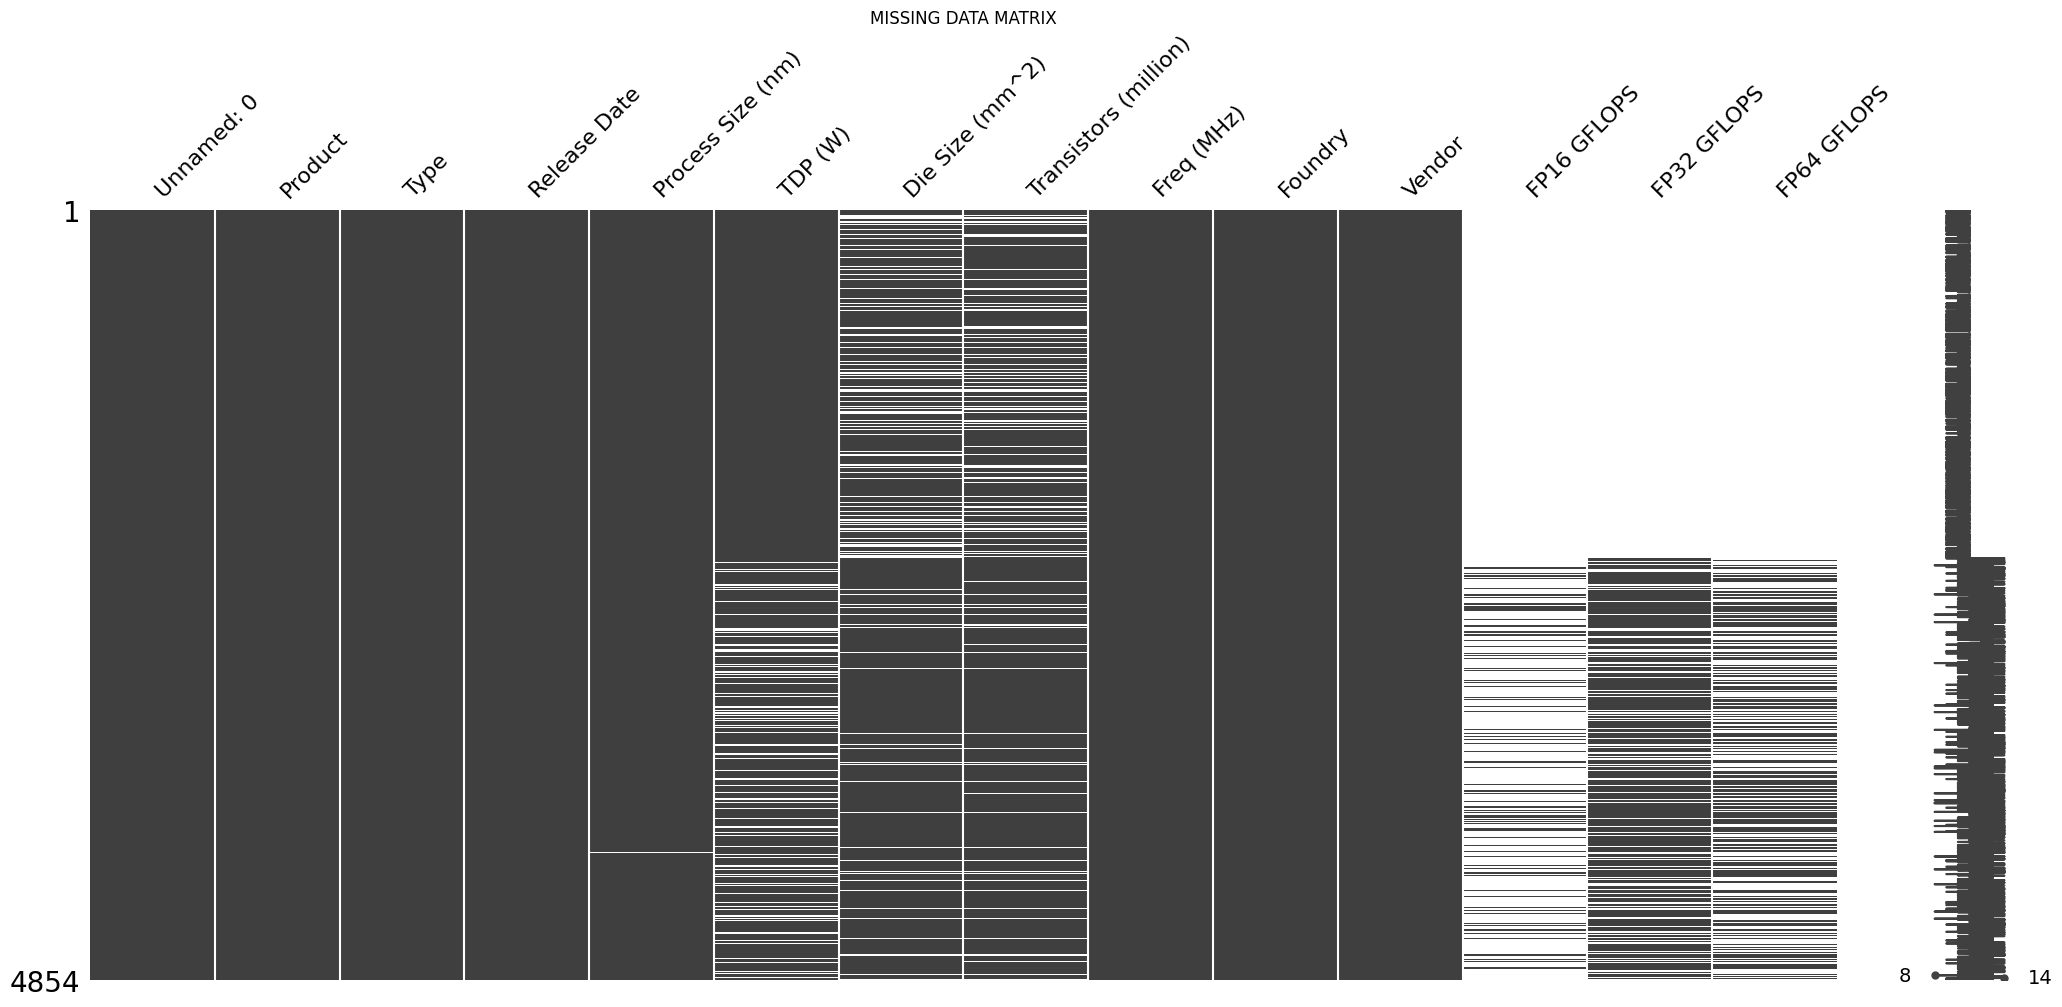

In [6]:
#PLOTTNG THE MISSINGNESS
# using a matrix plot

msno.matrix(df)

plt.title('MISSING DATA MATRIX')

Text(0.5, 1.0, 'MISSING DATA BAR CHART')

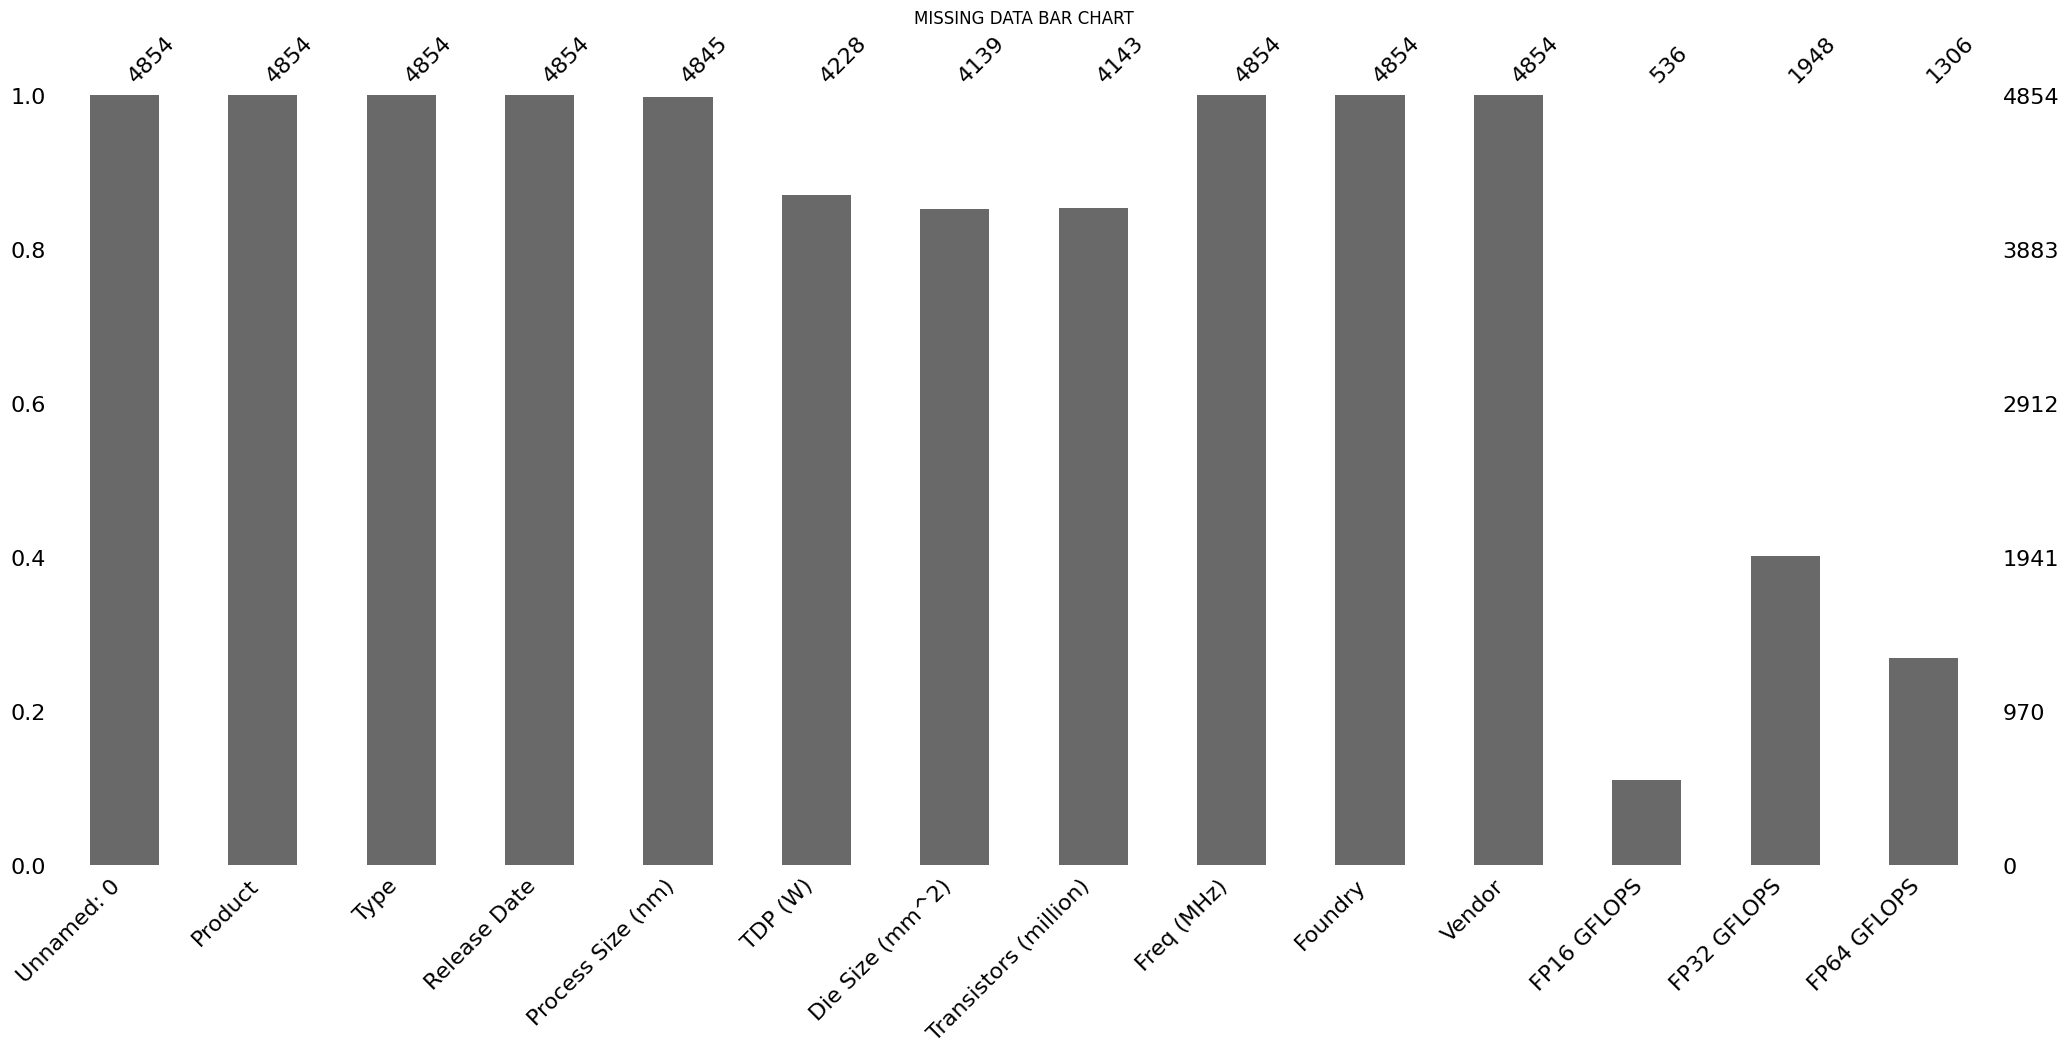

In [7]:
plt.figure(figsize=(14, 8))
msno.bar(df)

plt.title('MISSING DATA BAR CHART')

In [8]:
#CHECKING FOR DUPLICATES

duplicates = df.duplicated().sum()

print(f'number of duplicates: {duplicates}')

number of duplicates: 0


In [9]:
#There are no duplicates on the rows hence no need for dropping
# decided to deal with the missing values as follows:


In [20]:
# Impute numerical columns with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
    df[col].fillna(df[col].median(), inplace=True)




C:\Users\user\AppData\Local\Temp\ipykernel_10040\2241563299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10040\2241563299.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [21]:
# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [22]:
# Drop non-consequential fields (assuming fields with high missing percentage or irrelevant data)
non_consequential_fields = missing_data[missing_data['Percentage'] > 80].index
df.drop(columns=non_consequential_fields, inplace=True)


In [24]:
# Transform temporal data to correct format
# Assuming 'date_column' is the name of the date column, update it with the actual column name if different
date_column = 'date_column'
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])


In [25]:
# data after cleaning
print("\nData Info After Cleaning:")
print(df.info())



Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4854 non-null   float64
 5   TDP (W)                4854 non-null   float64
 6   Die Size (mm^2)        4854 non-null   float64
 7   Transistors (million)  4854 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP32 GFLOPS            4854 non-null   float64
 12  FP64 GFLOPS            4854 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB
None


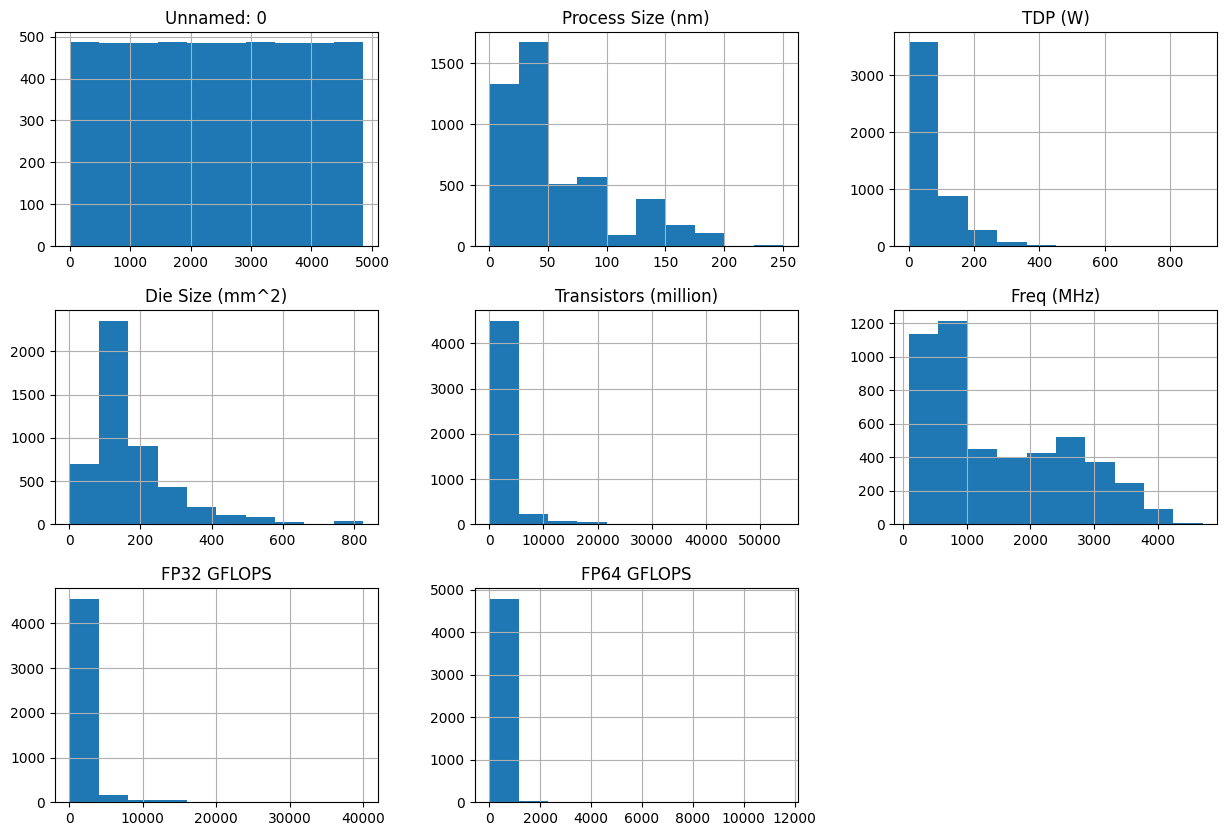

In [27]:
# Univariate analysis
df.hist(figsize=(15, 10))
plt.show()


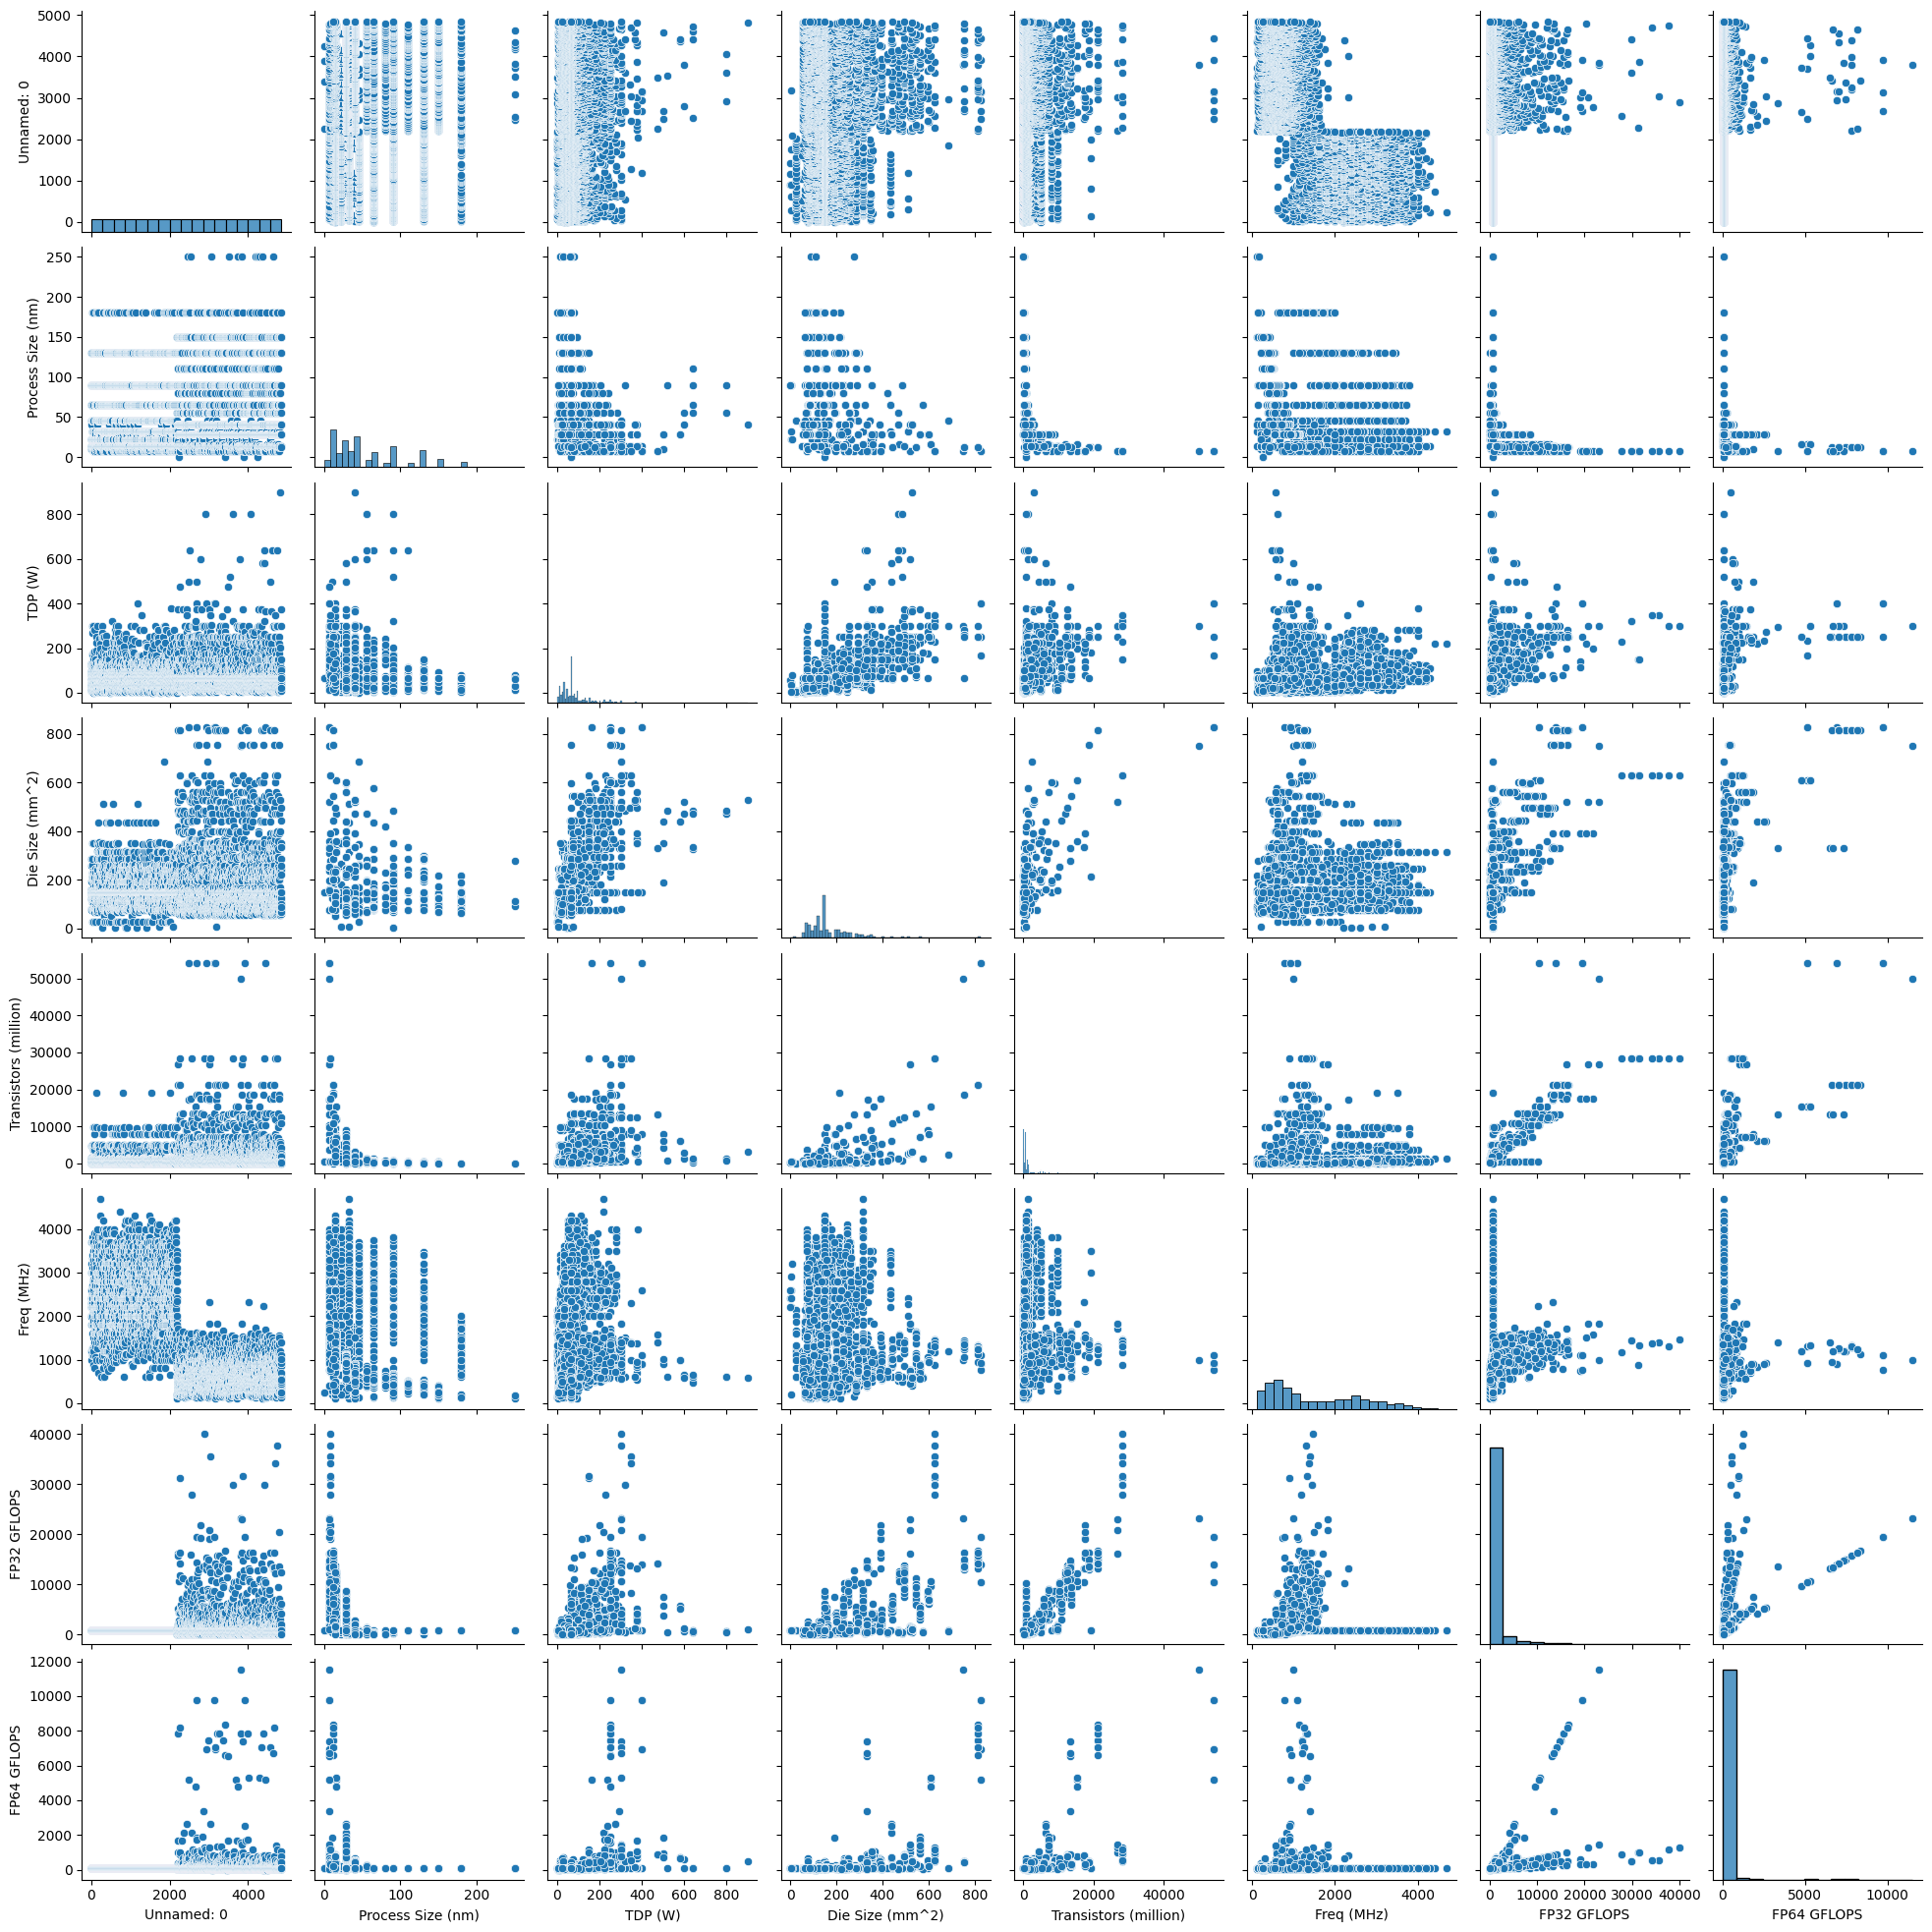

In [28]:
#Bivariate analysis
sns.pairplot(df)
plt.show()

In [34]:
# One-hot encode categorical columns
data = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows to check the transformation
print(df.head())


   Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2     28.0            148.0                  624.0      2600.0    Intel   
3     80.0            160.0                 1400.0      1800.0    Intel   
4    125.0            258.0                  758.0      3700.0  Unknown   

  Vendor  FP32 GFLOPS  FP64 GFLOPS  
0    AMD        696.0        89.28  
